# 0. Environtment and Library

In [ ]:
# !pip install category_encoders==2.2.2
!pip install catboost==0.26.1
!pip install ipywidgets==7.6.4
!pip install seaborn==0.11.2

In [1]:
from platform import python_version
import sklearn
import pandas as pd
import numpy as np
import scipy
import catboost
# import category_encoders
import ipywidgets
# import xgboost
import seaborn as sns

print("Tolong pastikan library anda memiliki versi yang sama dengan Library berikut:\n")
print('Python Version :', python_version())
print('Scikit-learn Version :', sklearn.__version__)
print('Pandas Version :', pd.__version__)
print('Numpy Version :', np.__version__)
print('Scipy Version :', scipy.__version__)
print('catboost Version :', catboost.__version__)
# print('category_encoders Version :', category_encoders.__version__)
print('ipywidgets Version :', ipywidgets.__version__)
# print('xgboost Version :', xgboost.__version__)
print('seaborn Version :', sns.__version__)

Tolong pastikan library anda memiliki versi yang sama dengan Library berikut:

Python Version : 3.7.3
Scikit-learn Version : 0.24.2
Pandas Version : 0.25.0
Numpy Version : 1.16.4
Scipy Version : 1.3.2
catboost Version : 0.26.1
ipywidgets Version : 7.6.4
seaborn Version : 0.11.2


In [2]:
# library untuk exploration
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import scipy.stats as stats
import os, re
import random

# library untuk modelling
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from catboost import CatBoostClassifier, Pool
# import category_encoders as ce

# seed agar hasil konsisten
def seed_everything(seed=None):
    if seed is None:
        seed = np.random.randint(100)
    random.seed(seed)
    np.random.seed(seed)
    return seed

angka_favorit = 42
seed = seed_everything(angka_favorit)

# Environtment


1. OS : <b>Windows 10 Pro 64-bit</b>
2. Processor : <b>Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz (12 CPUs), ~2.2GHz</b>
3. Display Memory : <b>128 MB</b>
4. Memory : <b>16384MB RAM</b>

# 1. Data Understanding

## 1.1. Load Data

In [3]:
## to load the file you can use os path join or chdir 
path_to_file = os.path.join('Training', 'Fraud Detection', 'fraud_detection_train.csv')
data = pd.read_csv(path_to_file)

# os.chdir('D:\Murtadho\Keperluan\BPJS Hacathon\Training\Fraud Detection')
# data = pd.read_csv('fraud_detection_train.csv')

## 1.2 Overview Data

• visit_id = id kunjungan <br>
• kdkc = kode wilayah kantor cabang <br>
• dati2 = kode daerah tingkat II RS <br>
• typeppk= kode tipe Rumah Sakit <br>
• jkpst = jenis kelamin peserta <br>
• umur = umur peserta saat mendapatkan pelayanan <br>
• jnspelsep = tingkat pelayanan <br>
• los = lama peserta dirawat <br>
• cmg = klasifikasi CMG (Case Mix Group) <br>
• severitylevel = tingkat urgensi <br>
• diagprimer = diagnosa primer <br>
• dx2_..._... = diagnosa sekunder <br>
• proc.._... = kode kelompok procedure <br>
• label = flag fraud; 1:fraud; 0:tidak fraud <br>

In [4]:
r, c = data.shape
print('data memiliki {:} baris dan {:} kolom'.format(r, c))

data memiliki 200217 baris dan 53 kolom


In [5]:
# melihat contoh data
data.sample(5, random_state=91)

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
166802,166803,1114,162,C,P,25,1,2,A,1,a00_b99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
43882,43883,1012,138,C,L,20,2,0,Q,0,d50_d89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
156493,156494,1301,217,SC,P,49,2,0,Q,0,n00_n99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119094,119095,903,113,I1,L,34,1,4,N,1,n00_n99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126667,126668,2603,371,C,L,61,1,6,L,1,l00_l99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0


In [6]:
# melihat missing value dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
visit_id         200217 non-null int64
kdkc             200217 non-null int64
dati2            200217 non-null int64
typeppk          200217 non-null object
jkpst            200217 non-null object
umur             200217 non-null int64
jnspelsep        200217 non-null int64
los              200217 non-null int64
cmg              200217 non-null object
severitylevel    200217 non-null int64
diagprimer       200217 non-null object
dx2_a00_b99      200217 non-null int64
dx2_c00_d48      200217 non-null int64
dx2_d50_d89      200217 non-null int64
dx2_e00_e90      200217 non-null int64
dx2_f00_f99      200217 non-null int64
dx2_g00_g99      200217 non-null int64
dx2_h00_h59      200217 non-null int64
dx2_h60_h95      200217 non-null int64
dx2_i00_i99      200217 non-null int64
dx2_j00_j99      200217 non-null int64
dx2_koo_k93      200217 non-null int64
dx2_l00_l99      200217 non

In [7]:
# melihat proporsi label fraud
data['label'].value_counts(normalize=True)

1    0.500732
0    0.499268
Name: label, dtype: float64

In [8]:
data.columns

Index(['visit_id', 'kdkc', 'dati2', 'typeppk', 'jkpst', 'umur', 'jnspelsep',
       'los', 'cmg', 'severitylevel', 'diagprimer', 'dx2_a00_b99',
       'dx2_c00_d48', 'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99',
       'dx2_g00_g99', 'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99',
       'dx2_j00_j99', 'dx2_koo_k93', 'dx2_l00_l99', 'dx2_m00_m99',
       'dx2_n00_n99', 'dx2_o00_o99', 'dx2_p00_p96', 'dx2_q00_q99',
       'dx2_r00_r99', 'dx2_s00_t98', 'dx2_u00_u99', 'dx2_v01_y98',
       'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27', 'proc28_28',
       'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51', 'proc52_57',
       'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73', 'proc74_75',
       'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99', 'procv00_v89',
       'label'],
      dtype='object')

In [9]:
# drop kolom yang tidak variatif (tidak memiliki pengaruh signifikan terhadap modeling)
no_var_col = []
epsilon = 0.0001
for col in data.select_dtypes(exclude=['object']).columns:
    var = data[col].var()
    if var <= epsilon:
        no_var_col.append(col)
# print(no_var_col)
data = data.drop(no_var_col, 1)

In [10]:
'''
procedur dan diagnosa sekunder bisa jadi merupakan satu analisa yang sama, maka kita bisa lakukan grouping dari fitur-fitur tersebut
'''
data['sum_dx2'] = data[[x for x in data.columns if 'dx2_' in x]].apply(lambda x : sum(x), axis=1)
data['sum_pro_all'] = data[[x for x in data.columns if 'proc' in x]].apply(lambda x : sum(x), axis=1)
data['avg_dx2'] = data[[x for x in data.columns if 'dx2_' in x]].apply(lambda x : np.mean(x), axis=1)
data['avg_pro_all'] = data[[x for x in data.columns if 'proc' in x]].apply(lambda x : np.mean(x), axis=1)

In [11]:
data.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label,sum_dx2,sum_pro_all,avg_dx2,avg_pro_all
0,1,1107,150,SB,P,64,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.000000
1,2,1303,200,C,L,45,1,9,E,3,e00_e90,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,4,4,0.2,0.222222
2,3,1114,172,B,P,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.000000
3,4,601,90,SC,L,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.000000
4,5,1006,130,B,L,27,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.000000


In [12]:
'''
fraud kadang terjadi ketika semakin sering orang mengisi 'default value' maka kemungkinan fraud tinggi, 
artinya orang itu asal2an mengisi
'''

# hitung banyaknya value yang 0 pada satu records/rows
data['count_zero_fill'] = data.drop(['visit_id', 'label', 'sum_dx2', 'sum_pro_all', 'avg_dx2', 'avg_pro_all'], 1).apply(lambda x : len([y for y in list(x) if y==0]), axis=1)

In [13]:
'''
karena kode wilayah kantor cabang, merupakan suatu pemetaan angka ke wilayah, maka perlakukannya harus 
diubah ke variable categorical
kode wilayah maksimal terdiri dari 4 angka, biasanya 2 angka pertama menyatakan wilayah tingkat 1, 
dan 2 angka kedua merupakan wilayah tingkat 2

'''
data['kdkc1'] = data['kdkc'].apply(lambda x : str(x).zfill(4)[:2])

# untuk daerah tingkat 2, jenis pelayanan dan severity level, langsung kita ubah saja ke string
data['dati2'] = data['dati2'].apply(str)
data['severitylevel'] = data['severitylevel'].apply(str)
data['jnspelsep'] = data['jnspelsep'].apply(str)
data['kdkc'] = data['kdkc'].apply(lambda x : str(x).zfill(4)[:2] + '.' +  str(x).zfill(4)[-2:])

# untuk diagnosa sekunder dan procedur juga merupakan kode kelompok, maka harus diubah dari value numeric ke categoric
cols = [x for x in data.columns if 'dx2' in x] + [x for x in data.columns if 'pro' in x]
for col in cols:
    data[col] = data[col].apply(str)

In [14]:
# tambah variable, apabila los=0 maka itu berarti orang tsb tidak rawat inap

data['rawat_inap'] = np.where(data['los']>0, 'ya', 'tidak')
display(pd.crosstab(data['rawat_inap'], data['label']))

print("dari sini diketahui terdapat beda antara orang yang rawat inap dan tidak rawat inap, yang tidak rawat inap presentasi fraudnya lebih tinggi")
print("\n\n mari kita breakdown lagi yang rawat inap")

y = data.loc[data['rawat_inap']=='ya', ['los', 'label']].reset_index().drop('index', 1)
display(pd.crosstab(pd.qcut(y['los'],4), y['label']))

print("yang rawat inap hanya 1 sampai 2 hari ternyata hampir 50% mengalami fraud, sedangkan yang diatas 2 hari presentasenya lebih besar dari 50%, jadi kita buat variable menjadi : 'tidak rawat inap', 'kurang dari 2', dan 'lebih dari 2'")

label,0,1
rawat_inap,,
tidak,64968,71449
ya,34994,28806


dari sini diketahui terdapat beda antara orang yang rawat inap dan tidak rawat inap, yang tidak rawat inap presentasi fraudnya lebih tinggi


 mari kita breakdown lagi yang rawat inap


label,0,1
los,,
"(0.999, 2.0]",14407,14541
"(2.0, 3.0]",7555,5476
"(3.0, 4.0]",4321,3068
"(4.0, 592.0]",8711,5721


yang rawat inap hanya 1 sampai 2 hari ternyata hampir 50% mengalami fraud, sedangkan yang diatas 2 hari presentasenya lebih besar dari 50%, jadi kita buat variable menjadi : 'tidak rawat inap', 'kurang dari 2', dan 'lebih dari 2'


In [15]:
# karena terdapat perbedaan antara rawat inap 0-2 dan >2 maka kita buat value baru
data['rawat_inap'] = np.where(data['los']>0, 'kurang dari 2', 'tidak')
data['rawat_inap'] = np.where(data['los']>2, 'lebih dari 2', data['rawat_inap'])

pd.crosstab(data['rawat_inap'], data['label'])

label,0,1
rawat_inap,,
kurang dari 2,14407,14541
lebih dari 2,20587,14265
tidak,64968,71449


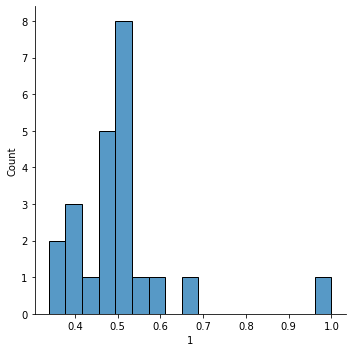

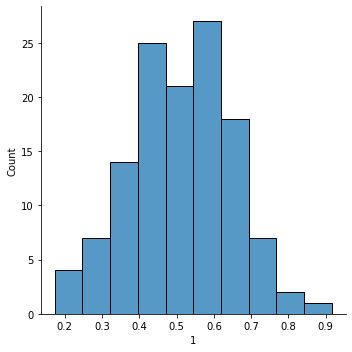

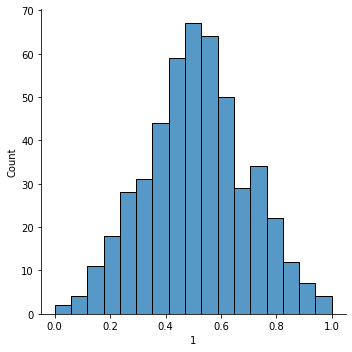

In [16]:
'''
Berdasarkan Uji Coba Sebelumnya, `CMG, KDKC, dan DATI2` merupakan variable importance dalam modelling. 
jadi kita akan coba tune variable ini. mari kita lihat distribusinya
'''

coba_cmg = pd.crosstab(data.cmg, data.label).apply(lambda x: x/x.sum(), axis=1)
sns.displot(coba_cmg[1])

coba = pd.crosstab(data.kdkc, data.label).apply(lambda x: x/x.sum(), axis=1).sort_values(by=[1], ascending=False)
sns.displot(coba[1])

coba1 = pd.crosstab(data.dati2, data.label).apply(lambda x: x/x.sum(), axis=1).sort_values(by=[1], ascending=False)
sns.displot(coba1[1])

In [17]:
# buat cluster untuk kdkc
display(pd.qcut(coba[1], 4).value_counts())

def potensi_kdkc(x):
    if x<=0.419:
        hasil=1
    elif x<=0.513:
        hasil=2
    elif x<=0.606:
        hasil=3
    else:
        hasil=4
    return hasil

coba['cluster_kdkc'] = coba[1].apply(lambda x: potensi_kdkc(x))
coba.reset_index(inplace=True)
clust_kdkc = coba[['kdkc','cluster_kdkc']]

# display(clust_kdkc.cluster_kdkc.value_counts())

data = data.merge(clust_kdkc, on = 'kdkc', how='inner')

(0.606, 0.916]    32
(0.173, 0.419]    32
(0.513, 0.606]    31
(0.419, 0.513]    31
Name: 1, dtype: int64

In [18]:
# buat cluster untuk cmg
display(pd.qcut(coba_cmg[1], 4).value_counts())

def potensi_cmg(x):
    if x<=0.458:
        hasil=1
    elif x<=0.495:
        hasil=2
    elif x<=0.517:
        hasil=3
    else:
        hasil=4
    return hasil

coba_cmg['cluster_cmg'] = coba_cmg[1].apply(lambda x: potensi_cmg(x))
coba_cmg.reset_index(inplace=True)
clust_cmg = coba_cmg[['cmg','cluster_cmg']]

data = data.merge(clust_cmg, on = 'cmg', how='inner')

(0.517, 1.0]      6
(0.458, 0.495]    6
(0.338, 0.458]    6
(0.495, 0.517]    5
Name: 1, dtype: int64

In [19]:
# buat cluster untuk dati2
display(pd.qcut(coba1[1],5).value_counts())

def potensi_dati2(x):
    if x<=0.355:
        hasil=1
    elif x<=0.469:
        hasil=2
    elif x<=0.558:
        hasil=3
    elif x<=0.667:
        hasil=4
    else:
        hasil=5
    return hasil

coba1['cluster_dati2'] = coba1[1].apply(lambda x: potensi_dati2(x))
coba1.reset_index(inplace=True)
clust_dati2 = coba1[['dati2','cluster_dati2']]

data = data.merge(clust_dati2, on = 'dati2', how='inner')

(0.558, 0.667]     99
(-0.001, 0.355]    98
(0.469, 0.558]     97
(0.355, 0.469]     97
(0.667, 1.0]       95
Name: 1, dtype: int64

In [20]:
print('mari kita kombinasikan antara dua variable')

# jenis pelayanan dan tingkat keparahan 
data['jnspelsep_x_severitylevel'] = data[['jnspelsep', 'severitylevel']].apply(lambda x : '-'.join(x), axis=1)

# jenis pelayanan dan rawat inap
data['jnspelsep_x_rawat_inap'] = data[['jnspelsep', 'rawat_inap']].apply(lambda x : '-'.join(x), axis=1)

# tingkat keparahan dan rawat inap
data['rawat_inap_x_severitylevel'] = data[['rawat_inap', 'severitylevel']].apply(lambda x : '-'.join(x), axis=1)

# # karena kdkc, dati2, dan cmg merupakan variable yang cukup berpengaruh, maka kita akan coba kombinasikan
# data['kdkc_x_dati2'] = data[['kdkc', 'dati2']].apply(lambda x : '-'.join(x), axis=1)
# data['kdkc_x_cmg'] = data[['kdkc', 'cmg']].apply(lambda x : '-'.join(x), axis=1)
# data['dati2_x_cmg'] = data[['dati2', 'cmg']].apply(lambda x : '-'.join(x), axis=1)

mari kita kombinasikan antara dua variable


In [21]:
display(pd.crosstab(data['jnspelsep_x_severitylevel'], data['label']))

display(pd.crosstab(data['jnspelsep_x_rawat_inap'], data['label']))

display(pd.crosstab(data['rawat_inap_x_severitylevel'], data['label']))

label,0,1
jnspelsep_x_severitylevel,,
1-0,0,3
1-1,27387,21100
1-2,6058,6413
1-3,2070,3085
2-0,64447,69653
2-3,0,1


label,0,1
jnspelsep_x_rawat_inap,,
1-kurang dari 2,14407,14541
1-lebih dari 2,20587,14265
1-tidak,521,1795
2-tidak,64447,69654


label,0,1
rawat_inap_x_severitylevel,,
kurang dari 2-0,0,1
kurang dari 2-1,12458,11478
kurang dari 2-2,1653,2356
kurang dari 2-3,296,706
lebih dari 2-1,14510,8184
lebih dari 2-2,4340,3839
lebih dari 2-3,1737,2242
tidak-0,64447,69655
tidak-1,419,1438


In [22]:
# melihat deskripsi data
data.describe()

,visit_id,umur,los,label,count_zero_fill,cluster_kdkc,cluster_cmg,cluster_dati2
count,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000
mean,100109.000000,36.850602,1.303356,0.500732,38.401380,2.389213,2.670737,2.909738
std,57797.813761,23.095928,5.639751,0.500001,1.640518,1.101551,0.899447,1.289991
min,1.000000,0.000000,0.000000,0.000000,27.000000,1.000000,1.000000,1.000000
25%,50055.000000,18.000000,0.000000,0.000000,37.000000,1.000000,2.000000,2.000000
50%,100109.000000,39.000000,0.000000,1.000000,39.000000,2.000000,3.000000,3.000000
75%,150163.000000,56.000000,2.000000,1.000000,40.000000,3.000000,3.000000,4.000000
max,200217.000000,109.000000,592.000000,1.000000,41.000000,4.000000,4.000000,5.000000


In [23]:
# melihat deskripsi data
data.describe(include=['O'])

,kdkc,dati2,typeppk,jkpst,jnspelsep,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,sum_dx2,sum_pro_all,avg_dx2,avg_pro_all,kdkc1,rawat_inap,jnspelsep_x_severitylevel,jnspelsep_x_rawat_inap,rawat_inap_x_severitylevel
count,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217,200217
unique,126,486,25,2,2,23,4,21,5,4,4,7,3,5,5,4,7,5,4,4,5,7,14,7,5,8,3,6,5,6,4,3,3,6,5,4,6,4,4,3,5,5,4,7,22,2,15,24,15,24,26,3,6,4,11
top,06.01,217,SC,P,2,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,10,tidak,2-0,2-tidak,tidak-0
freq,4472,4393,50140,107374,134101,81736,134103,10205,195426,198587,196194,191728,199200,197338,196847,198859,188685,195135,199087,196236,195411,194469,197066,199222,194270,198743,199047,190632,196870,195297,199588,200106,199787,198844,196742,199465,197152,199367,199249,198599,197643,196810,199948,198936,107278,198370,138073,90291,138073,90291,40321,136417,134100,134101,134102


## 1.3. Data Correlation

### 1.3.1. Numerical Variable

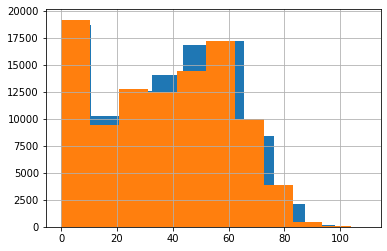

In [24]:
# mari kita lihat distri
yes = data.loc[data['label']==1]
no = data.loc[data['label']==0]

yes['umur'].hist()
no['umur'].hist()

In [25]:
# kelompokkan usia berdasarkan 10 distribusi
data['age_groups'] = pd.qcut(data['umur'], 10)
display(pd.crosstab(data['age_groups'], data['label']))

print("nampaknya variable umur tidak significant terhadap label target")

label,0,1
age_groups,,
"(-0.001, 2.0]",11399,10928
"(2.0, 12.0]",9418,9341
"(12.0, 22.0]",9908,9727
"(22.0, 31.0]",10778,10309
"(31.0, 39.0]",9928,10163
"(39.0, 46.0]",9282,9023
"(46.0, 53.0]",10993,11153
"(53.0, 59.0]",9509,9943
"(59.0, 66.0]",9431,10104


nampaknya variable umur tidak significant terhadap label target


In [26]:
# buang variable yang tidak diperlukan, jenis kelamin kita drop juga karena secara probabilitas hampir 50:50 
data = data.drop(['umur', 'age_groups', 'los'], 1) # 'jkpst'

In [27]:
# kolom2 yang akan kita gunakan dalam modelling
data.columns

Index(['visit_id', 'kdkc', 'dati2', 'typeppk', 'jkpst', 'jnspelsep', 'cmg',
       'severitylevel', 'diagprimer', 'dx2_a00_b99', 'dx2_c00_d48',
       'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99', 'dx2_g00_g99',
       'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99', 'dx2_j00_j99',
       'dx2_l00_l99', 'dx2_m00_m99', 'dx2_n00_n99', 'dx2_o00_o99',
       'dx2_p00_p96', 'dx2_q00_q99', 'dx2_r00_r99', 'dx2_s00_t98',
       'dx2_v01_y98', 'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27',
       'proc28_28', 'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51',
       'proc52_57', 'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73',
       'proc74_75', 'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99',
       'label', 'sum_dx2', 'sum_pro_all', 'avg_dx2', 'avg_pro_all',
       'count_zero_fill', 'kdkc1', 'rawat_inap', 'cluster_kdkc', 'cluster_cmg',
       'cluster_dati2', 'jnspelsep_x_severitylevel', 'jnspelsep_x_rawat_inap',
       'rawat_inap_x_severitylevel'],
      dtype='object')

# 2. Modelling

In [28]:
train, test = train_test_split(data, test_size=0.3, random_state=91)

In [29]:
# train = pd.DataFrame(train)
# test = pd.DataFrame(test)

In [30]:
train.shape, test.shape

((140151, 61), (60066, 61))

## 2.1. CatBoost

In [31]:
# untuk training gunakan inih
train_used = train.drop(['visit_id', 'label'], 1)
test_used = test.drop(['visit_id', 'label'], 1)

cat_features = [x for x in train_used.columns if x not in ['sum_dx2', 'sum_pro_all', 'avg_dx2', 'avg_pro_all', 'count_zero_fill']]

# untuk validation gunakan inih
data_used = data.drop(['visit_id', 'label'], 1)

cat_features = [x for x in data_used.columns if x not in ['sum_dx2', 'sum_pro_all', 'avg_dx2', 'avg_pro_all', 'count_zero_fill']]

In [32]:
train_dataset = Pool(data_used, data['label'], feature_names=list(train_used.columns), cat_features=cat_features)

model_params = {
    'iterations': 2000, 
    'loss_function': 'MultiClass', 
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
    'learning_rate': 0.05
}

model = CatBoostClassifier(**model_params)
model.fit(train_dataset, verbose=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6873625	total: 854ms	remaining: 28m 28s
1:	learn: 0.6821180	total: 1.52s	remaining: 25m 23s
2:	learn: 0.6773955	total: 2.3s	remaining: 25m 29s
3:	learn: 0.6727419	total: 3.14s	remaining: 26m 6s
4:	learn: 0.6693821	total: 3.9s	remaining: 25m 55s
5:	learn: 0.6655983	total: 4.58s	remaining: 25m 21s
6:	learn: 0.6616031	total: 5.32s	remaining: 25m 15s
7:	learn: 0.6591587	total: 6.1s	remaining: 25m 19s
8:	learn: 0.6558695	total: 6.9s	remaining: 25m 25s
9:	learn: 0.6528759	total: 7.57s	remaining: 25m 6s
10:	learn: 0.6510129	total: 8.15s	remaining: 24m 33s
11:	learn: 0.6475348	total: 8.96s	remaining: 24m 44s
12:	learn: 0.6460084	total: 9.72s	remaining: 24m 46s
13:	learn: 0.6424442	total: 10.5s	remaining: 24m 53s
14:	learn: 0.6388363	total: 11.3s	remaining: 24m 53s
15:	learn: 0.6354155	total: 11.9s	remaining: 24m 40s
16:	learn: 0.6323733	total: 12.7s	remaining: 24m 42s
17:	learn: 0.6293114	total: 13.4s	remaining: 24m 31s
18:	learn: 0.6265119	total: 14s	remaining: 24m 21s
19:	learn: 

154:	learn: 0.5458464	total: 1m 59s	remaining: 23m 43s
155:	learn: 0.5457964	total: 2m	remaining: 23m 42s
156:	learn: 0.5455771	total: 2m 1s	remaining: 23m 44s
157:	learn: 0.5454867	total: 2m 2s	remaining: 23m 44s
158:	learn: 0.5453610	total: 2m 3s	remaining: 23m 44s
159:	learn: 0.5452163	total: 2m 3s	remaining: 23m 43s
160:	learn: 0.5451373	total: 2m 4s	remaining: 23m 41s
161:	learn: 0.5451166	total: 2m 5s	remaining: 23m 40s
162:	learn: 0.5450717	total: 2m 5s	remaining: 23m 39s
163:	learn: 0.5450470	total: 2m 6s	remaining: 23m 39s
164:	learn: 0.5449763	total: 2m 7s	remaining: 23m 38s
165:	learn: 0.5449438	total: 2m 8s	remaining: 23m 36s
166:	learn: 0.5448519	total: 2m 8s	remaining: 23m 34s
167:	learn: 0.5448337	total: 2m 9s	remaining: 23m 32s
168:	learn: 0.5447458	total: 2m 10s	remaining: 23m 30s
169:	learn: 0.5446820	total: 2m 11s	remaining: 23m 30s
170:	learn: 0.5446126	total: 2m 11s	remaining: 23m 29s
171:	learn: 0.5444099	total: 2m 12s	remaining: 23m 27s
172:	learn: 0.5443325	tota

305:	learn: 0.5368999	total: 4m 4s	remaining: 22m 31s
306:	learn: 0.5368696	total: 4m 4s	remaining: 22m 30s
307:	learn: 0.5367367	total: 4m 5s	remaining: 22m 29s
308:	learn: 0.5367149	total: 4m 6s	remaining: 22m 28s
309:	learn: 0.5366800	total: 4m 7s	remaining: 22m 27s
310:	learn: 0.5366511	total: 4m 7s	remaining: 22m 26s
311:	learn: 0.5366181	total: 4m 8s	remaining: 22m 25s
312:	learn: 0.5365817	total: 4m 9s	remaining: 22m 24s
313:	learn: 0.5365630	total: 4m 10s	remaining: 22m 23s
314:	learn: 0.5365058	total: 4m 10s	remaining: 22m 21s
315:	learn: 0.5364944	total: 4m 11s	remaining: 22m 21s
316:	learn: 0.5364877	total: 4m 12s	remaining: 22m 20s
317:	learn: 0.5364647	total: 4m 13s	remaining: 22m 20s
318:	learn: 0.5364266	total: 4m 14s	remaining: 22m 19s
319:	learn: 0.5363554	total: 4m 14s	remaining: 22m 18s
320:	learn: 0.5363361	total: 4m 15s	remaining: 22m 17s
321:	learn: 0.5363205	total: 4m 16s	remaining: 22m 15s
322:	learn: 0.5362889	total: 4m 17s	remaining: 22m 14s
323:	learn: 0.5362

455:	learn: 0.5330261	total: 6m 2s	remaining: 20m 27s
456:	learn: 0.5329803	total: 6m 3s	remaining: 20m 27s
457:	learn: 0.5329730	total: 6m 4s	remaining: 20m 26s
458:	learn: 0.5329660	total: 6m 4s	remaining: 20m 24s
459:	learn: 0.5329466	total: 6m 5s	remaining: 20m 23s
460:	learn: 0.5329280	total: 6m 6s	remaining: 20m 22s
461:	learn: 0.5328832	total: 6m 7s	remaining: 20m 22s
462:	learn: 0.5328791	total: 6m 7s	remaining: 20m 21s
463:	learn: 0.5328604	total: 6m 8s	remaining: 20m 20s
464:	learn: 0.5328030	total: 6m 9s	remaining: 20m 19s
465:	learn: 0.5327857	total: 6m 10s	remaining: 20m 19s
466:	learn: 0.5327719	total: 6m 11s	remaining: 20m 18s
467:	learn: 0.5327574	total: 6m 11s	remaining: 20m 16s
468:	learn: 0.5327449	total: 6m 12s	remaining: 20m 15s
469:	learn: 0.5327296	total: 6m 13s	remaining: 20m 14s
470:	learn: 0.5326959	total: 6m 14s	remaining: 20m 14s
471:	learn: 0.5326860	total: 6m 15s	remaining: 20m 14s
472:	learn: 0.5326148	total: 6m 15s	remaining: 20m 13s
473:	learn: 0.532605

606:	learn: 0.5304145	total: 8m 4s	remaining: 18m 32s
607:	learn: 0.5304109	total: 8m 5s	remaining: 18m 31s
608:	learn: 0.5303992	total: 8m 6s	remaining: 18m 30s
609:	learn: 0.5303832	total: 8m 6s	remaining: 18m 29s
610:	learn: 0.5303788	total: 8m 7s	remaining: 18m 28s
611:	learn: 0.5303743	total: 8m 8s	remaining: 18m 27s
612:	learn: 0.5303269	total: 8m 9s	remaining: 18m 26s
613:	learn: 0.5303126	total: 8m 9s	remaining: 18m 25s
614:	learn: 0.5302946	total: 8m 10s	remaining: 18m 24s
615:	learn: 0.5302724	total: 8m 11s	remaining: 18m 23s
616:	learn: 0.5302654	total: 8m 11s	remaining: 18m 22s
617:	learn: 0.5302618	total: 8m 12s	remaining: 18m 21s
618:	learn: 0.5302528	total: 8m 13s	remaining: 18m 20s
619:	learn: 0.5302405	total: 8m 14s	remaining: 18m 19s
620:	learn: 0.5302332	total: 8m 15s	remaining: 18m 19s
621:	learn: 0.5302267	total: 8m 15s	remaining: 18m 18s
622:	learn: 0.5302069	total: 8m 16s	remaining: 18m 17s
623:	learn: 0.5301446	total: 8m 17s	remaining: 18m 16s
624:	learn: 0.5301

757:	learn: 0.5286086	total: 10m 5s	remaining: 16m 31s
758:	learn: 0.5285778	total: 10m 6s	remaining: 16m 30s
759:	learn: 0.5285681	total: 10m 6s	remaining: 16m 30s
760:	learn: 0.5285545	total: 10m 7s	remaining: 16m 29s
761:	learn: 0.5285081	total: 10m 8s	remaining: 16m 28s
762:	learn: 0.5285007	total: 10m 9s	remaining: 16m 28s
763:	learn: 0.5284975	total: 10m 10s	remaining: 16m 27s
764:	learn: 0.5284580	total: 10m 11s	remaining: 16m 27s
765:	learn: 0.5284493	total: 10m 12s	remaining: 16m 26s
766:	learn: 0.5284421	total: 10m 13s	remaining: 16m 25s
767:	learn: 0.5284314	total: 10m 13s	remaining: 16m 24s
768:	learn: 0.5284139	total: 10m 14s	remaining: 16m 23s
769:	learn: 0.5284102	total: 10m 15s	remaining: 16m 22s
770:	learn: 0.5284022	total: 10m 16s	remaining: 16m 22s
771:	learn: 0.5283984	total: 10m 16s	remaining: 16m 21s
772:	learn: 0.5283863	total: 10m 17s	remaining: 16m 20s
773:	learn: 0.5283646	total: 10m 18s	remaining: 16m 19s
774:	learn: 0.5283576	total: 10m 19s	remaining: 16m 18

905:	learn: 0.5269885	total: 12m 5s	remaining: 14m 35s
906:	learn: 0.5269822	total: 12m 5s	remaining: 14m 34s
907:	learn: 0.5269762	total: 12m 6s	remaining: 14m 34s
908:	learn: 0.5269655	total: 12m 7s	remaining: 14m 33s
909:	learn: 0.5269570	total: 12m 8s	remaining: 14m 32s
910:	learn: 0.5269518	total: 12m 9s	remaining: 14m 31s
911:	learn: 0.5269415	total: 12m 10s	remaining: 14m 31s
912:	learn: 0.5269225	total: 12m 11s	remaining: 14m 30s
913:	learn: 0.5269208	total: 12m 11s	remaining: 14m 29s
914:	learn: 0.5268989	total: 12m 13s	remaining: 14m 29s
915:	learn: 0.5268942	total: 12m 14s	remaining: 14m 28s
916:	learn: 0.5268900	total: 12m 15s	remaining: 14m 28s
917:	learn: 0.5268773	total: 12m 15s	remaining: 14m 27s
918:	learn: 0.5268682	total: 12m 16s	remaining: 14m 26s
919:	learn: 0.5268581	total: 12m 17s	remaining: 14m 25s
920:	learn: 0.5268517	total: 12m 18s	remaining: 14m 24s
921:	learn: 0.5268468	total: 12m 18s	remaining: 14m 23s
922:	learn: 0.5268344	total: 12m 19s	remaining: 14m 23

1052:	learn: 0.5255566	total: 14m 7s	remaining: 12m 42s
1053:	learn: 0.5255397	total: 14m 8s	remaining: 12m 41s
1054:	learn: 0.5255297	total: 14m 9s	remaining: 12m 41s
1055:	learn: 0.5255235	total: 14m 10s	remaining: 12m 40s
1056:	learn: 0.5255158	total: 14m 11s	remaining: 12m 39s
1057:	learn: 0.5255121	total: 14m 11s	remaining: 12m 38s
1058:	learn: 0.5255042	total: 14m 12s	remaining: 12m 37s
1059:	learn: 0.5254980	total: 14m 13s	remaining: 12m 37s
1060:	learn: 0.5254884	total: 14m 14s	remaining: 12m 36s
1061:	learn: 0.5254856	total: 14m 15s	remaining: 12m 35s
1062:	learn: 0.5254842	total: 14m 15s	remaining: 12m 34s
1063:	learn: 0.5254774	total: 14m 16s	remaining: 12m 33s
1064:	learn: 0.5254696	total: 14m 17s	remaining: 12m 32s
1065:	learn: 0.5254168	total: 14m 18s	remaining: 12m 32s
1066:	learn: 0.5254045	total: 14m 19s	remaining: 12m 31s
1067:	learn: 0.5254019	total: 14m 19s	remaining: 12m 30s
1068:	learn: 0.5253868	total: 14m 20s	remaining: 12m 29s
1069:	learn: 0.5253818	total: 14m 

1197:	learn: 0.5243571	total: 16m 5s	remaining: 10m 46s
1198:	learn: 0.5243498	total: 16m 6s	remaining: 10m 45s
1199:	learn: 0.5243440	total: 16m 7s	remaining: 10m 44s
1200:	learn: 0.5243348	total: 16m 8s	remaining: 10m 44s
1201:	learn: 0.5243194	total: 16m 8s	remaining: 10m 43s
1202:	learn: 0.5243176	total: 16m 9s	remaining: 10m 42s
1203:	learn: 0.5243159	total: 16m 10s	remaining: 10m 41s
1204:	learn: 0.5243122	total: 16m 10s	remaining: 10m 40s
1205:	learn: 0.5242968	total: 16m 11s	remaining: 10m 39s
1206:	learn: 0.5242961	total: 16m 12s	remaining: 10m 38s
1207:	learn: 0.5242924	total: 16m 13s	remaining: 10m 38s
1208:	learn: 0.5242852	total: 16m 14s	remaining: 10m 37s
1209:	learn: 0.5242840	total: 16m 14s	remaining: 10m 36s
1210:	learn: 0.5242777	total: 16m 15s	remaining: 10m 35s
1211:	learn: 0.5242764	total: 16m 16s	remaining: 10m 34s
1212:	learn: 0.5242763	total: 16m 16s	remaining: 10m 33s
1213:	learn: 0.5242685	total: 16m 17s	remaining: 10m 32s
1214:	learn: 0.5242291	total: 16m 18s

1344:	learn: 0.5232126	total: 18m 9s	remaining: 8m 50s
1345:	learn: 0.5232093	total: 18m 9s	remaining: 8m 49s
1346:	learn: 0.5232058	total: 18m 10s	remaining: 8m 48s
1347:	learn: 0.5232003	total: 18m 11s	remaining: 8m 47s
1348:	learn: 0.5231967	total: 18m 12s	remaining: 8m 47s
1349:	learn: 0.5231916	total: 18m 12s	remaining: 8m 46s
1350:	learn: 0.5231901	total: 18m 13s	remaining: 8m 45s
1351:	learn: 0.5231862	total: 18m 14s	remaining: 8m 44s
1352:	learn: 0.5231855	total: 18m 15s	remaining: 8m 43s
1353:	learn: 0.5231820	total: 18m 15s	remaining: 8m 42s
1354:	learn: 0.5231732	total: 18m 16s	remaining: 8m 41s
1355:	learn: 0.5231680	total: 18m 17s	remaining: 8m 41s
1356:	learn: 0.5231657	total: 18m 18s	remaining: 8m 40s
1357:	learn: 0.5231379	total: 18m 18s	remaining: 8m 39s
1358:	learn: 0.5231254	total: 18m 19s	remaining: 8m 38s
1359:	learn: 0.5231192	total: 18m 20s	remaining: 8m 37s
1360:	learn: 0.5231118	total: 18m 21s	remaining: 8m 36s
1361:	learn: 0.5231061	total: 18m 21s	remaining: 8

1492:	learn: 0.5222356	total: 20m 6s	remaining: 6m 49s
1493:	learn: 0.5222314	total: 20m 7s	remaining: 6m 48s
1494:	learn: 0.5222244	total: 20m 8s	remaining: 6m 48s
1495:	learn: 0.5222225	total: 20m 8s	remaining: 6m 47s
1496:	learn: 0.5222160	total: 20m 9s	remaining: 6m 46s
1497:	learn: 0.5222077	total: 20m 10s	remaining: 6m 45s
1498:	learn: 0.5222050	total: 20m 11s	remaining: 6m 44s
1499:	learn: 0.5221901	total: 20m 12s	remaining: 6m 44s
1500:	learn: 0.5221867	total: 20m 13s	remaining: 6m 43s
1501:	learn: 0.5221844	total: 20m 13s	remaining: 6m 42s
1502:	learn: 0.5221824	total: 20m 14s	remaining: 6m 41s
1503:	learn: 0.5221802	total: 20m 15s	remaining: 6m 40s
1504:	learn: 0.5221762	total: 20m 15s	remaining: 6m 39s
1505:	learn: 0.5221656	total: 20m 16s	remaining: 6m 39s
1506:	learn: 0.5221490	total: 20m 17s	remaining: 6m 38s
1507:	learn: 0.5221398	total: 20m 18s	remaining: 6m 37s
1508:	learn: 0.5221218	total: 20m 19s	remaining: 6m 36s
1509:	learn: 0.5221195	total: 20m 19s	remaining: 6m 3

1640:	learn: 0.5211189	total: 22m 4s	remaining: 4m 49s
1641:	learn: 0.5211152	total: 22m 4s	remaining: 4m 48s
1642:	learn: 0.5211097	total: 22m 5s	remaining: 4m 47s
1643:	learn: 0.5211064	total: 22m 6s	remaining: 4m 47s
1644:	learn: 0.5211033	total: 22m 6s	remaining: 4m 46s
1645:	learn: 0.5210967	total: 22m 7s	remaining: 4m 45s
1646:	learn: 0.5210808	total: 22m 8s	remaining: 4m 44s
1647:	learn: 0.5210779	total: 22m 9s	remaining: 4m 43s
1648:	learn: 0.5210757	total: 22m 9s	remaining: 4m 43s
1649:	learn: 0.5210715	total: 22m 10s	remaining: 4m 42s
1650:	learn: 0.5210695	total: 22m 11s	remaining: 4m 41s
1651:	learn: 0.5210442	total: 22m 12s	remaining: 4m 40s
1652:	learn: 0.5210299	total: 22m 12s	remaining: 4m 39s
1653:	learn: 0.5210288	total: 22m 13s	remaining: 4m 38s
1654:	learn: 0.5210274	total: 22m 14s	remaining: 4m 38s
1655:	learn: 0.5210108	total: 22m 15s	remaining: 4m 37s
1656:	learn: 0.5210056	total: 22m 15s	remaining: 4m 36s
1657:	learn: 0.5209935	total: 22m 16s	remaining: 4m 35s
1

1788:	learn: 0.5200024	total: 24m 3s	remaining: 2m 50s
1789:	learn: 0.5200008	total: 24m 3s	remaining: 2m 49s
1790:	learn: 0.5199933	total: 24m 4s	remaining: 2m 48s
1791:	learn: 0.5199906	total: 24m 5s	remaining: 2m 47s
1792:	learn: 0.5199844	total: 24m 6s	remaining: 2m 46s
1793:	learn: 0.5199759	total: 24m 7s	remaining: 2m 46s
1794:	learn: 0.5199541	total: 24m 7s	remaining: 2m 45s
1795:	learn: 0.5199508	total: 24m 8s	remaining: 2m 44s
1796:	learn: 0.5199431	total: 24m 9s	remaining: 2m 43s
1797:	learn: 0.5199361	total: 24m 10s	remaining: 2m 42s
1798:	learn: 0.5199208	total: 24m 11s	remaining: 2m 42s
1799:	learn: 0.5199131	total: 24m 11s	remaining: 2m 41s
1800:	learn: 0.5199053	total: 24m 12s	remaining: 2m 40s
1801:	learn: 0.5198945	total: 24m 13s	remaining: 2m 39s
1802:	learn: 0.5198869	total: 24m 14s	remaining: 2m 38s
1803:	learn: 0.5198725	total: 24m 15s	remaining: 2m 38s
1804:	learn: 0.5198706	total: 24m 15s	remaining: 2m 37s
1805:	learn: 0.5198678	total: 24m 16s	remaining: 2m 36s
1

1936:	learn: 0.5188619	total: 26m 3s	remaining: 50.9s
1937:	learn: 0.5188614	total: 26m 4s	remaining: 50s
1938:	learn: 0.5188503	total: 26m 4s	remaining: 49.2s
1939:	learn: 0.5188427	total: 26m 5s	remaining: 48.4s
1940:	learn: 0.5188384	total: 26m 6s	remaining: 47.6s
1941:	learn: 0.5188340	total: 26m 7s	remaining: 46.8s
1942:	learn: 0.5188317	total: 26m 7s	remaining: 46s
1943:	learn: 0.5188242	total: 26m 8s	remaining: 45.2s
1944:	learn: 0.5188185	total: 26m 9s	remaining: 44.4s
1945:	learn: 0.5188165	total: 26m 10s	remaining: 43.6s
1946:	learn: 0.5188109	total: 26m 10s	remaining: 42.8s
1947:	learn: 0.5187993	total: 26m 11s	remaining: 42s
1948:	learn: 0.5187928	total: 26m 12s	remaining: 41.1s
1949:	learn: 0.5187865	total: 26m 13s	remaining: 40.3s
1950:	learn: 0.5187850	total: 26m 14s	remaining: 39.5s
1951:	learn: 0.5187746	total: 26m 14s	remaining: 38.7s
1952:	learn: 0.5187630	total: 26m 15s	remaining: 37.9s
1953:	learn: 0.5187621	total: 26m 16s	remaining: 37.1s
1954:	learn: 0.5187572	to

In [40]:
y_pred = model.predict(train_used)

print(classification_report(train['label'], y_pred))
print(roc_auc_score(train['label'], y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80     69945
           1       0.80      0.83      0.81     70206

    accuracy                           0.81    140151
   macro avg       0.81      0.81      0.81    140151
weighted avg       0.81      0.81      0.81    140151

0.8088187589050839


In [34]:
# y_pred = model.predict(test_used)

# print(classification_report(test['label'], y_pred))
# print(roc_auc_score(test['label'], y_pred))

In [35]:
# cek fitur yang paling berpengaruh terhadap model
importances = model.get_feature_importance()
indices = np.argsort(importances)[::-1]
report_dict = {}

report_dict['feature_importance'] = {train_used.columns[idx]: float(importances[idx]) for idx in indices}

In [36]:
report_dict

{'feature_importance': {'cluster_dati2': 14.095282045885476,
  'dati2': 12.503929571549227,
  'typeppk': 10.218402093578197,
  'diagprimer': 9.718825391037505,
  'rawat_inap_x_severitylevel': 9.498326977125663,
  'cmg': 9.323653134781017,
  'kdkc': 6.427810509137908,
  'cluster_cmg': 4.667907709614536,
  'proc80_99': 2.3498470403670866,
  'severitylevel': 2.0797386812842524,
  'jnspelsep_x_rawat_inap': 1.4805746949185845,
  'kdkc1': 1.3890033890702773,
  'proc14_23': 0.8377257332838836,
  'proc58_62': 0.7911407172031097,
  'cluster_kdkc': 0.7506514311237394,
  'proc71_73': 0.7007315167989709,
  'dx2_p00_p96': 0.6683864774690843,
  'proc00_13': 0.6529828360650753,
  'dx2_n00_n99': 0.5777817865293794,
  'dx2_i00_i99': 0.5499058554053241,
  'proc52_57': 0.5429789407663546,
  'count_zero_fill': 0.5145546313444216,
  'jnspelsep_x_severitylevel': 0.5040063526690712,
  'dx2_s00_t98': 0.4576211536100643,
  'dx2_d50_d89': 0.4507055906887818,
  'rawat_inap': 0.43440619973474254,
  'proce00_e99':

# 3. Validasi

In [81]:
path_to_file_val = os.path.join('Fraud Detection', 'fraud_detection_val.csv')
dataval = pd.read_csv(path_to_file_val)

In [82]:
dataval.shape

(49762, 52)

In [83]:
# lakukan hal yang sama pada data validasi
dataval = dataval.drop(no_var_col, 1)
dataval['sum_dx2'] = dataval[[x for x in dataval.columns if 'dx2_' in x]].apply(lambda x : sum(x), axis=1)
dataval['sum_pro_all'] = dataval[[x for x in dataval.columns if 'proc' in x]].apply(lambda x : sum(x), axis=1)
dataval['avg_dx2'] = dataval[[x for x in dataval.columns if 'dx2_' in x]].apply(lambda x : np.mean(x), axis=1)
dataval['avg_pro_all'] = dataval[[x for x in dataval.columns if 'proc' in x]].apply(lambda x : np.mean(x), axis=1)
dataval['count_zero_fill'] = dataval.drop(['visit_id'], 1).apply(lambda x : len([y for y in list(x) if y==0]), axis=1)

dataval['kdkc1'] = dataval['kdkc'].apply(lambda x : str(x).zfill(4)[:2])

# untuk daerah tingkat 2, jenis pelayanan dan severity level, langsung kita ubah saja ke string
dataval['dati2'] = dataval['dati2'].apply(str)
dataval['severitylevel'] = dataval['severitylevel'].apply(str)
dataval['jnspelsep'] = dataval['jnspelsep'].apply(str)
dataval['kdkc'] = dataval['kdkc'].apply(lambda x : str(x).zfill(4)[:2] + '.' +  str(x).zfill(4)[-2:])

# untuk diagnosa sekunder dan procedur juga merupakan kode kelompok, maka harus diubah dari value numeric ke categoric
cols = [x for x in dataval.columns if 'dx2' in x] + [x for x in dataval.columns if 'pro' in x]
for col in cols:
    dataval[col] = dataval[col].apply(str)
    
coba_cmg = pd.crosstab(data.cmg, data.label).apply(lambda x: x/x.sum(), axis=1)
coba_cmg['cluster_cmg'] = coba_cmg[1].apply(lambda x: potensi_cmg(x))
coba_cmg.reset_index(inplace=True)
clust_cmg = coba_cmg[['cmg','cluster_cmg']]

dataval = dataval.merge(clust_cmg, on = 'cmg', how='left')

coba1 = pd.crosstab(data.dati2, data.label).apply(lambda x: x/x.sum(), axis=1).sort_values(by=[1], ascending=False)
coba1['cluster_dati2'] = coba1[1].apply(lambda x: potensi_dati2(x))
coba1.reset_index(inplace=True)
clust_dati2 = coba1[['dati2','cluster_dati2']]

dataval = dataval.merge(clust_dati2, on = 'dati2', how='left')

coba = pd.crosstab(data.kdkc, data.label).apply(lambda x: x/x.sum(), axis=1).sort_values(by=[1], ascending=False)
coba['cluster_kdkc'] = coba[1].apply(lambda x: potensi_kdkc(x))
coba.reset_index(inplace=True)
clust_kdkc = coba[['kdkc','cluster_kdkc']]

dataval = dataval.merge(clust_kdkc, on = 'kdkc', how='left')

dataval['rawat_inap'] = np.where(dataval['los']>0, 'kurang dari 2', 'tidak')
dataval['rawat_inap'] = np.where(dataval['los']>2, 'lebih dari 2', dataval['rawat_inap'])
dataval['jnspelsep_x_severitylevel'] = dataval[['jnspelsep', 'severitylevel']].apply(lambda x : '-'.join(x), axis=1)
dataval['jnspelsep_x_rawat_inap'] = dataval[['jnspelsep', 'rawat_inap']].apply(lambda x : '-'.join(x), axis=1)
dataval['rawat_inap_x_severitylevel'] = dataval[['rawat_inap', 'severitylevel']].apply(lambda x : '-'.join(x), axis=1)
dataval = dataval.drop(['umur', 'los'], 1)

dataval_used = dataval.drop(['visit_id'], 1)

In [84]:
train_used.columns

Index(['kdkc', 'dati2', 'typeppk', 'jkpst', 'jnspelsep', 'cmg',
       'severitylevel', 'diagprimer', 'dx2_a00_b99', 'dx2_c00_d48',
       'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99', 'dx2_g00_g99',
       'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99', 'dx2_j00_j99',
       'dx2_l00_l99', 'dx2_m00_m99', 'dx2_n00_n99', 'dx2_o00_o99',
       'dx2_p00_p96', 'dx2_q00_q99', 'dx2_r00_r99', 'dx2_s00_t98',
       'dx2_v01_y98', 'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27',
       'proc28_28', 'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51',
       'proc52_57', 'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73',
       'proc74_75', 'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99',
       'sum_dx2', 'sum_pro_all', 'avg_dx2', 'avg_pro_all', 'count_zero_fill',
       'kdkc1', 'rawat_inap', 'cluster_kdkc', 'cluster_cmg', 'cluster_dati2',
       'jnspelsep_x_severitylevel', 'jnspelsep_x_rawat_inap',
       'rawat_inap_x_severitylevel'],
      dtype='object')

In [85]:
dataval_used.isnull().sum()

kdkc                          0
dati2                         0
typeppk                       0
jkpst                         0
jnspelsep                     0
cmg                           0
severitylevel                 0
diagprimer                    0
dx2_a00_b99                   0
dx2_c00_d48                   0
dx2_d50_d89                   0
dx2_e00_e90                   0
dx2_f00_f99                   0
dx2_g00_g99                   0
dx2_h00_h59                   0
dx2_h60_h95                   0
dx2_i00_i99                   0
dx2_j00_j99                   0
dx2_l00_l99                   0
dx2_m00_m99                   0
dx2_n00_n99                   0
dx2_o00_o99                   0
dx2_p00_p96                   0
dx2_q00_q99                   0
dx2_r00_r99                   0
dx2_s00_t98                   0
dx2_v01_y98                   0
dx2_z00_z99                   0
proc00_13                     0
proc14_23                     0
proc24_27                     0
proc28_2

In [86]:
dataval_used['cluster_dati2'].value_counts()

2.0    13865
3.0    11736
4.0     9847
1.0     7744
5.0     6569
Name: cluster_dati2, dtype: int64

In [75]:
data['cluster_dati2'].value_counts().idxmax()

2

In [87]:
# isi missing value dengan nilai terbanyak
dataval_used['cluster_dati2'] = dataval_used['cluster_dati2'].fillna(data['cluster_dati2'].value_counts().idxmax())
dataval_used['cluster_dati2'] = dataval_used['cluster_dati2'].astype(int)

In [90]:
dataval_used.isnull().sum()

kdkc                          0
dati2                         0
typeppk                       0
jkpst                         0
jnspelsep                     0
cmg                           0
severitylevel                 0
diagprimer                    0
dx2_a00_b99                   0
dx2_c00_d48                   0
dx2_d50_d89                   0
dx2_e00_e90                   0
dx2_f00_f99                   0
dx2_g00_g99                   0
dx2_h00_h59                   0
dx2_h60_h95                   0
dx2_i00_i99                   0
dx2_j00_j99                   0
dx2_l00_l99                   0
dx2_m00_m99                   0
dx2_n00_n99                   0
dx2_o00_o99                   0
dx2_p00_p96                   0
dx2_q00_q99                   0
dx2_r00_r99                   0
dx2_s00_t98                   0
dx2_v01_y98                   0
dx2_z00_z99                   0
proc00_13                     0
proc14_23                     0
proc24_27                     0
proc28_2

In [91]:
dataval_used.columns

Index(['kdkc', 'dati2', 'typeppk', 'jkpst', 'jnspelsep', 'cmg',
       'severitylevel', 'diagprimer', 'dx2_a00_b99', 'dx2_c00_d48',
       'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99', 'dx2_g00_g99',
       'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99', 'dx2_j00_j99',
       'dx2_l00_l99', 'dx2_m00_m99', 'dx2_n00_n99', 'dx2_o00_o99',
       'dx2_p00_p96', 'dx2_q00_q99', 'dx2_r00_r99', 'dx2_s00_t98',
       'dx2_v01_y98', 'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27',
       'proc28_28', 'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51',
       'proc52_57', 'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73',
       'proc74_75', 'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99',
       'sum_dx2', 'sum_pro_all', 'avg_dx2', 'avg_pro_all', 'count_zero_fill',
       'kdkc1', 'cluster_cmg', 'cluster_dati2', 'cluster_kdkc', 'rawat_inap',
       'jnspelsep_x_severitylevel', 'jnspelsep_x_rawat_inap',
       'rawat_inap_x_severitylevel'],
      dtype='object')

In [92]:
y_pred = model.predict(dataval_used)

result = pd.DataFrame()
result['visit_id'] = dataval['visit_id']
result['predict_label'] = y_pred

In [93]:
result['predict_label'].value_counts()

1    26403
0    23359
Name: predict_label, dtype: int64

In [94]:
result_previous = pd.read_csv('submission_val.csv')

In [95]:
result_all = result.merge(result_previous, on='visit_id')

In [96]:
result_all.head()

,visit_id,predict_label_x,predict_label_y
0,1,1,0
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


In [97]:
pd.crosstab(result_all['predict_label_x'], result_all['predict_label_y'])

predict_label_y,0,1
predict_label_x,,
0,22625,734
1,2001,24402


In [99]:
result.to_csv('submission_val_kedua.csv', index=0)

In [100]:
result.shape

(49762, 2)